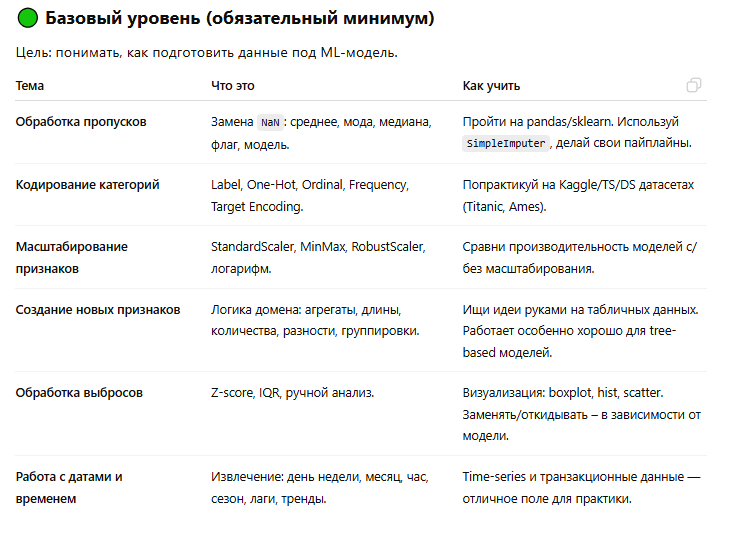

In [1]:
from IPython.display import Image
Image('min.png')

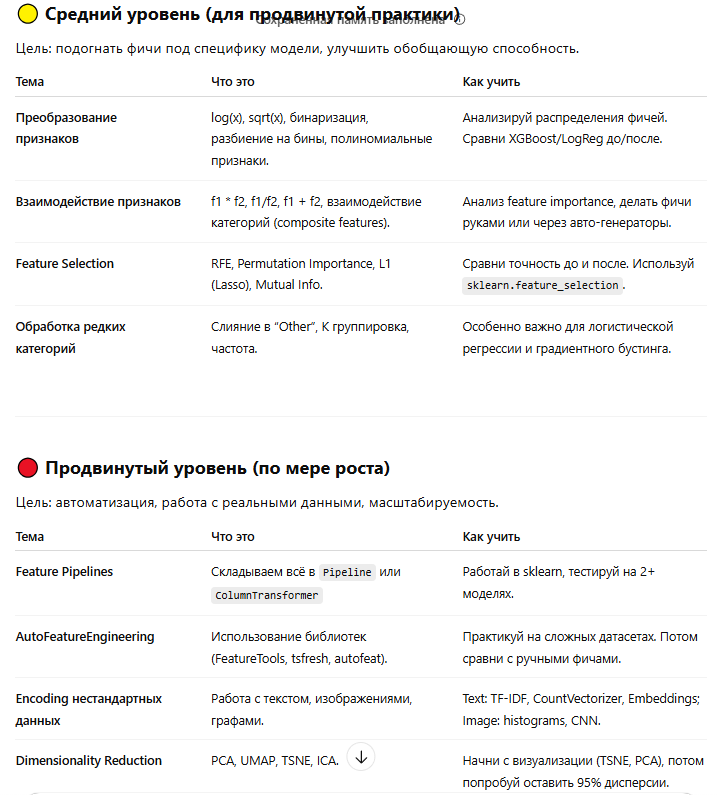

In [2]:
Image('ave_max.png')

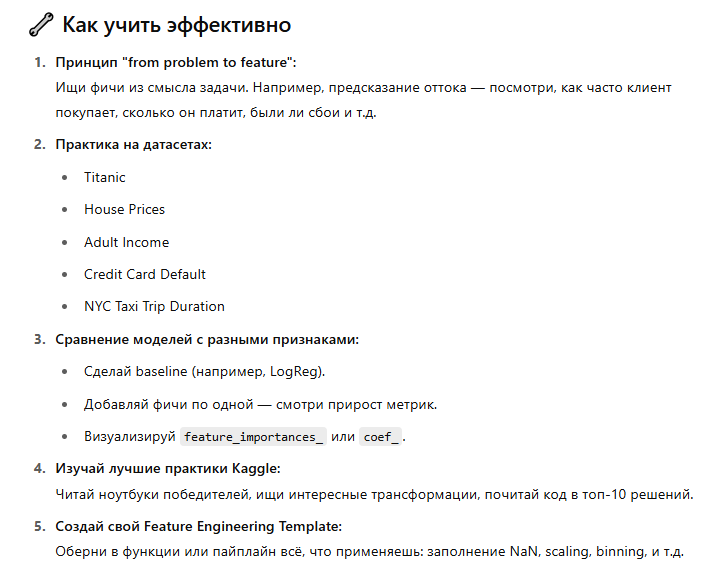

In [3]:
Image('advice.png')

# Тема №1: Обработка пропусков (Missing Values)

Пропуски — это ячейки, в которых отсутствует значение.
Обычно представлены как NaN, None, '' или ?.
#### Почему это важно:
* Модели не работают с NaN.
* Пропуски могут быть информативны (например, "отсутствие зарплаты" может значить "не работает").

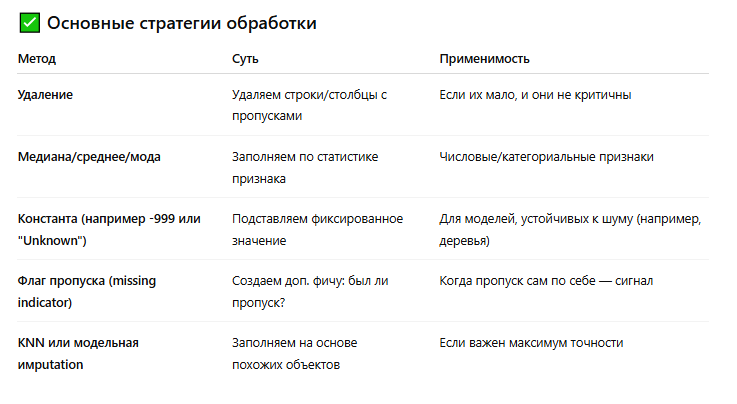

In [4]:
Image('obrabotka.png')

In [5]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Пример датафрейма
df = pd.DataFrame({
    'age': [25, np.nan, 30, 45],
    'salary': [50000, 60000, np.nan, 80000]
})

# Заполнение средним
imp_mean = SimpleImputer(strategy='mean')
df[['age', 'salary']] = imp_mean.fit_transform(df[['age', 'salary']])


In [6]:
df

,age,salary
0,25.000000,50000.000000
1,33.333333,60000.000000
2,30.000000,63333.333333
3,45.000000,80000.000000


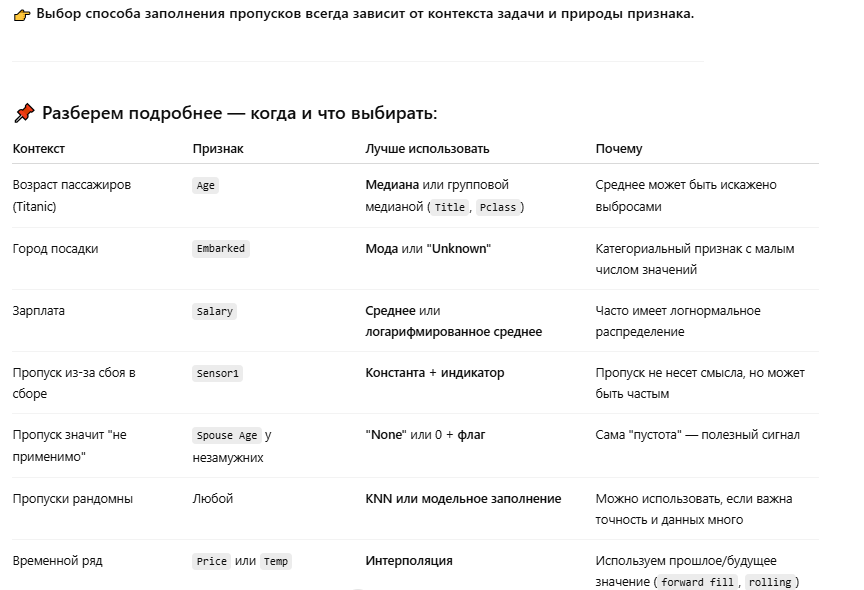

In [7]:
Image('cases.png')

## 1. Если пропусков много (более 30%)
Рассматривай удаление признака или его замену флагом.

## 2. Если пропуски коррелируют с целевой переменной
Сделай фичу-признак: was_missing = True/False
Часто дает буст, особенно в задачах оттока/рисков/fraud.

## Как принимать решение по пропускам
1) Часто ли они встречаются?
2) Имеет ли смысл "пропущенность"?
3) Какая природа признака? (число/категория/время)
4) Насколько важен этот признак?
5) Повлияет ли стратегия на модель?

In [51]:
# У тебя есть небольшой датафрейм с информацией о клиентах страховой компании:
import pandas as pd
import numpy as np

data = {
    'Age': [25, 42, np.nan, 36, np.nan, 57],
    'Gender': ['Male', 'Female', 'Female', np.nan, 'Male', 'Male'],
    'MaritalStatus': ['Single', 'Married', 'Single', 'Divorced', np.nan, 'Married'],
    'Income': [50000, 72000, 61000, np.nan, 59000, np.nan],
    'PolicyType': ['Auto', 'Life', np.nan, 'Health', 'Life', 'Auto'],
    'ClaimFiled': [0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

In [52]:
df.isna().sum()

Age              2
Gender           1
MaritalStatus    1
Income           2
PolicyType       1
ClaimFiled       0
dtype: int64

In [53]:
# Добавь индикаторы пропусков:
df['Income_missing'] = df['Income'].isna().astype(int)
df['PolicyType_missing'] = df['PolicyType'].isna().astype(int)


In [54]:
df

,Age,Gender,MaritalStatus,Income,PolicyType,ClaimFiled,Income_missing,PolicyType_missing
0,25.0,Male,Single,50000.0,Auto,0,0,0
1,42.0,Female,Married,72000.0,Life,1,0,0
2,NaN,Female,Single,61000.0,NaN,0,0,1
3,36.0,NaN,Divorced,NaN,Health,1,1,0
4,NaN,Male,NaN,59000.0,Life,0,0,0
5,57.0,Male,Married,NaN,Auto,1,1,0


In [55]:
df.Age.fillna(df.Age.median(), inplace=True)
df.Gender.fillna(df.Gender.mode()[0], inplace=True)
df.MaritalStatus.fillna('Unknown', inplace=True)
df.Income.fillna(df.Income.mean(), inplace=True)
df.PolicyType.fillna('Unknown', inplace=True)


C:\Users\Alex\AppData\Local\Temp\ipykernel_20072\4064155138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(), inplace=True)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20072\4064155138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [56]:
df

,Age,Gender,MaritalStatus,Income,PolicyType,ClaimFiled,Income_missing,PolicyType_missing
0,25.0,Male,Single,50000.0,Auto,0,0,0
1,42.0,Female,Married,72000.0,Life,1,0,0
2,39.0,Female,Single,61000.0,Unknown,0,0,1
3,36.0,Male,Divorced,60500.0,Health,1,1,0
4,39.0,Male,Unknown,59000.0,Life,0,0,0
5,57.0,Male,Married,60500.0,Auto,1,1,0


# Тема №2: Кодирование категориальных признаков (Categorical Encoding)

### Зачем это нужно?
Большинство ML-моделей (особенно линейные, KNN, SVM, нейросети) не умеют работать напрямую со строками.
Поэтому категориальные переменные нужно преобразовать в числовой формат.



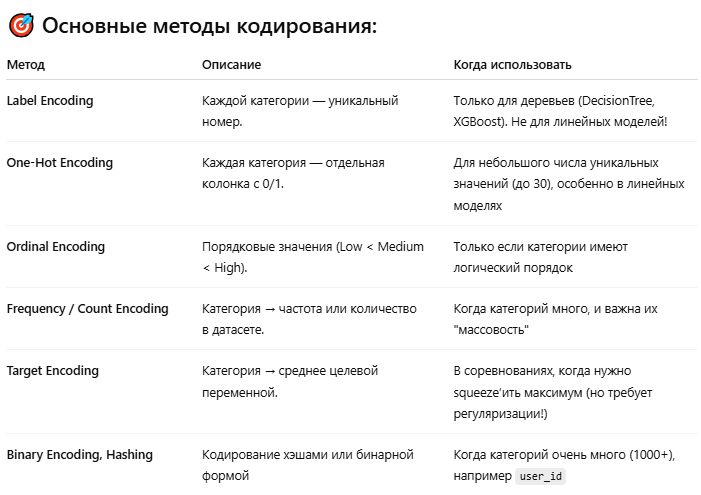

In [58]:
Image('coding.png')

In [66]:
df = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Red', 'Blue', 'Green'],
    'Size': ['S', 'M', 'L', 'XL', 'M', 'S'],
    'Target': [1, 0, 0, 1, 0, 1]
})


In [60]:
# Label Encoding (только для деревьев)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Color_le'] = le.fit_transform(df['Color'])
df

,Color,Size,Target,Color_le
0,Red,S,1,2
1,Green,M,0,1
2,Blue,L,0,0
3,Red,XL,1,2
4,Blue,M,0,0
5,Green,S,1,1


In [62]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Color', 'Size'])
df_encoded

,Target,Color_Blue,Color_Green,Color_Red,Size_L,Size_M,Size_S,Size_XL
0,1,False,False,True,False,False,True,False
1,0,False,True,False,False,True,False,False
2,0,True,False,False,True,False,False,False
3,1,False,False,True,False,False,False,True
4,0,True,False,False,False,True,False,False
5,1,False,True,False,False,False,True,False


In [65]:
# Frequency Encoding
freq_map = df['Color'].value_counts(normalize=True).to_dict()
df['Color_freq'] = df['Color'].map(freq_map)
df

,Color,Size,Target,Color_freq
0,Red,S,1,0.333333
1,Green,M,0,0.333333
2,Blue,L,0,0.333333
3,Red,XL,1,0.333333
4,Blue,M,0,0.333333
5,Green,S,1,0.333333


In [67]:
mean_target = df['Target'].mean()
target_map = df.groupby('Color')['Target'].mean()
df['Color_target_enc'] = df['Color'].map(target_map)
df

,Color,Size,Target,Color_target_enc
0,Red,S,1,1.0
1,Green,M,0,0.5
2,Blue,L,0,0.0
3,Red,XL,1,1.0
4,Blue,M,0,0.0
5,Green,S,1,0.5


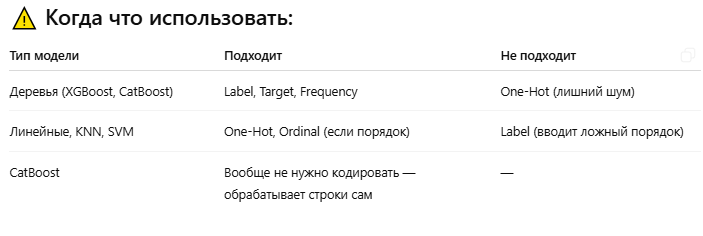

In [68]:
Image('code_use.png')

In [77]:
# Используй вот такой датафрейм:

df = pd.DataFrame({
    'Job': ['Teacher', 'Engineer', 'Artist', 'Engineer', 'Artist', 'Teacher'],
    'Department': ['HR', 'IT', 'Creative', 'IT', 'Creative', 'HR'],
    'Salary': [50000, 75000, 42000, 80000, 43000, 52000]
})

In [75]:
df

,Job,Department,Salary
0,Teacher,HR,50000
1,Engineer,IT,75000
2,Artist,Creative,42000
3,Engineer,IT,80000
4,Artist,Creative,43000
5,Teacher,HR,52000


In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Job_le'] = le.fit_transform(df['Job'])
df['Department_le'] = le.fit_transform(df['Department'])
df

,Job,Department,Salary,Job_le,Department_le
0,Teacher,HR,50000,2,1
1,Engineer,IT,75000,1,2
2,Artist,Creative,42000,0,0
3,Engineer,IT,80000,1,2
4,Artist,Creative,43000,0,0
5,Teacher,HR,52000,2,1


In [76]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Salary,Job_Engineer,Job_Teacher,Department_HR,Department_IT
0,50000,False,True,True,False
1,75000,True,False,False,True
2,42000,False,False,False,False
3,80000,True,False,False,True
4,43000,False,False,False,False
5,52000,False,True,True,False


In [78]:
freq_map1 = df['Job'].value_counts(normalize=True).to_dict()
freq_map2 = df['Department'].value_counts(normalize=True).to_dict()
df['Job_freq'] = df['Job'].map(freq_map1)
df['Department_freq'] = df['Department'].map(freq_map2)
df

,Job,Department,Salary,Job_freq,Department_freq
0,Teacher,HR,50000,0.333333,0.333333
1,Engineer,IT,75000,0.333333,0.333333
2,Artist,Creative,42000,0.333333,0.333333
3,Engineer,IT,80000,0.333333,0.333333
4,Artist,Creative,43000,0.333333,0.333333
5,Teacher,HR,52000,0.333333,0.333333


## Что происходит, если ты делаешь это по всей выборке (train + val)?
Ты используешь информацию о целевой переменной (Target) из валидации или теста при обучении.
То есть ты даешь модели подглядеть в будущее — она знает, какой должна быть цель, и начинает переобучаться.

Это искусственно завышает метрики на валидации, но модель проваливается на новых данных.

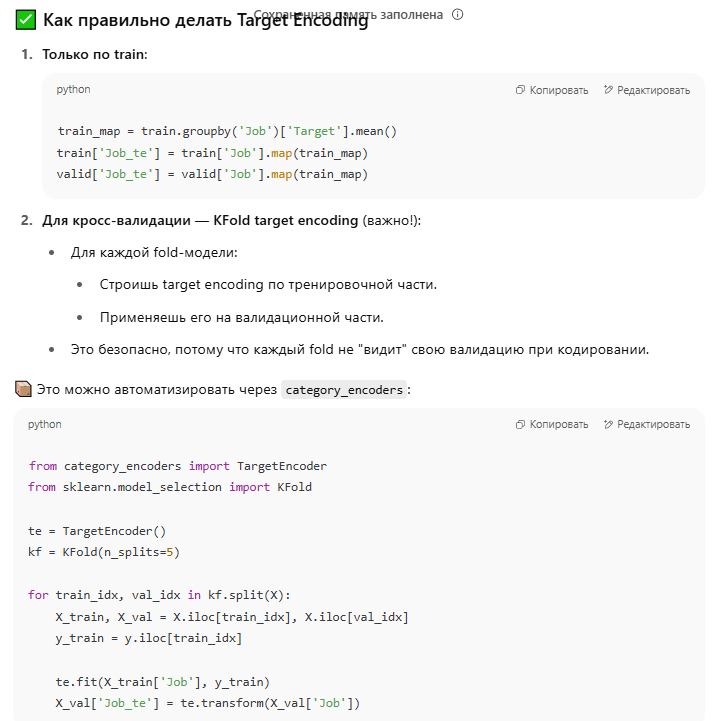

In [80]:
Image('tar_enc.png')

| Делать                         | Почему                                     |
| ------------------------------ | ------------------------------------------ |
| ✅ Target Encoding по train     | Модель не знает target других строк        |
| ❌ Target Encoding по train+val | Модель подсматривает ответы = data leakage |


# Тема №3: Создание новых признаков (Feature Generation / Feature Construction)

## Что это?
* Создание новых признаков (features) — это процесс извлечения полезных сигналов из сырых данных. Это может быть:

* комбинация существующих фичей,

* извлечение статистики,

* трансформация данных,

* знания о предметной области.

🧠 Часто одна хорошо придуманная фича даёт больший прирост качества, чем замена модели!

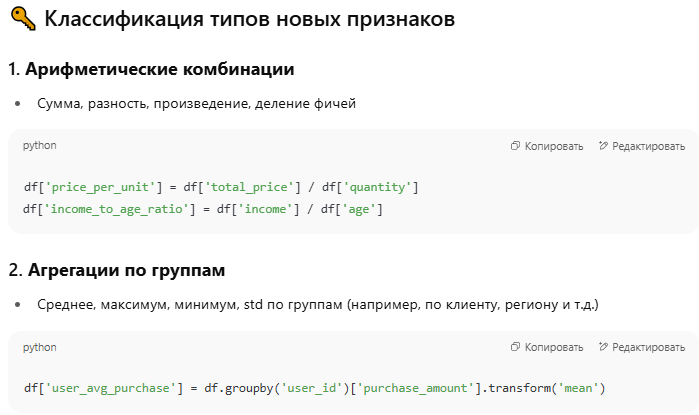

In [81]:
Image('class1.png')

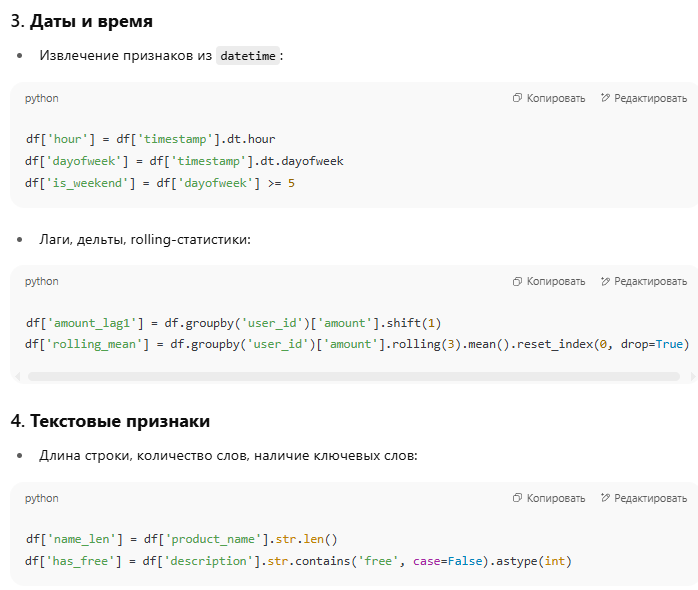

In [82]:
Image('class2.png')

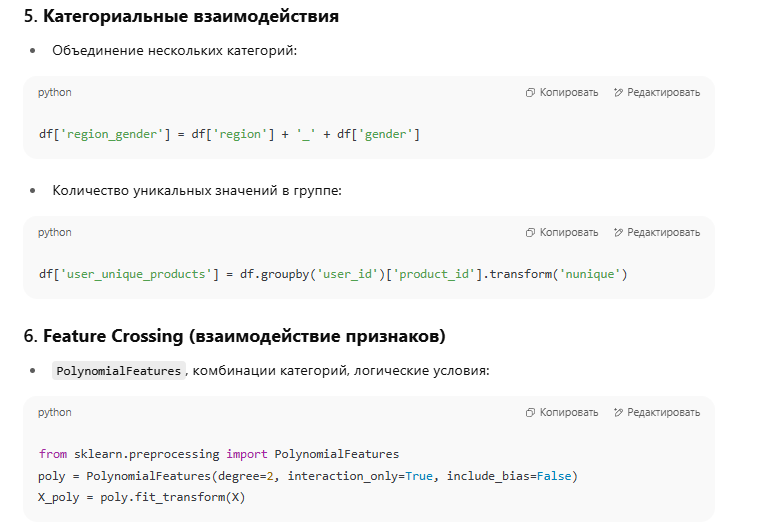

In [83]:
Image('class3.png')

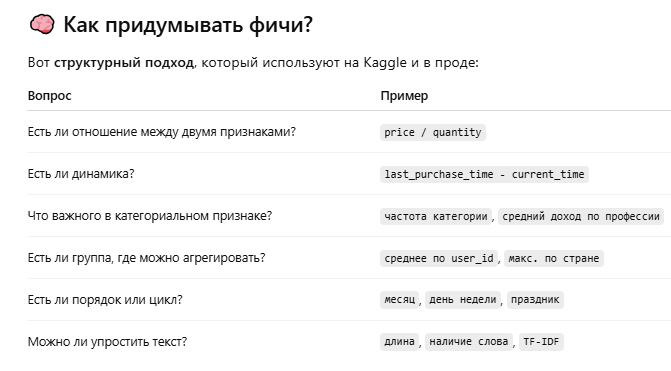

In [84]:
Image('crib_feat.png')

In [85]:
import pandas as pd

df = pd.DataFrame({
    'user_id': [1, 1, 2, 2, 3, 3],
    'order_time': pd.to_datetime([
        '2023-01-01 10:00', '2023-01-02 12:00',
        '2023-01-01 11:00', '2023-01-03 14:00',
        '2023-01-02 09:00', '2023-01-05 16:00'
    ]),
    'amount': [100, 150, 200, 180, 120, 300]
})

"""
Задания:
Добавь колонку hour и dayofweek из order_time.

Для каждого user_id, посчитай:

общее количество заказов,

средний чек,

лаг по времени между заказами (в часах).

Добавь фичу high_amount = 1, если amount > 200.
"""

'\nЗадания:\nДобавь колонку hour и dayofweek из order_time.\n\nДля каждого user_id, посчитай:\n\nобщее количество заказов,\n\nсредний чек,\n\nлаг по времени между заказами (в часах).\n\nДобавь фичу high_amount = 1, если amount > 200.\n'

In [86]:
df['hour'] = df['order_time'].dt.hour
df['dayofweek'] = df['order_time'].dt.dayofweek


In [87]:
temp_df = df.sort_values(['user_id', 'order_time']).copy()
temp_df['time_lag'] = temp_df.groupby('user_id')['order_time'].diff().dt.total_seconds() / 3600

In [88]:
user_stats = temp_df.groupby('user_id').agg(
    total_orders=('amount', 'size'),
    avg_receipt=('amount', 'mean'),
    avg_time_lag=('time_lag', 'mean')
).reset_index()

In [89]:
df = df.merge(user_stats, on='user_id')
df['high_amount'] = (df['amount'] > 200).astype(int)

In [90]:
df

,user_id,order_time,amount,hour,dayofweek,total_orders,avg_receipt,avg_time_lag,high_amount
0,1,2023-01-01 10:00:00,100,10,6,2,125.0,26.0,0
1,1,2023-01-02 12:00:00,150,12,0,2,125.0,26.0,0
2,2,2023-01-01 11:00:00,200,11,6,2,190.0,51.0,0
3,2,2023-01-03 14:00:00,180,14,1,2,190.0,51.0,0
4,3,2023-01-02 09:00:00,120,9,0,2,210.0,79.0,0
5,3,2023-01-05 16:00:00,300,16,3,2,210.0,79.0,1


# Тема №4: масштабирование признаков (feature scaling)

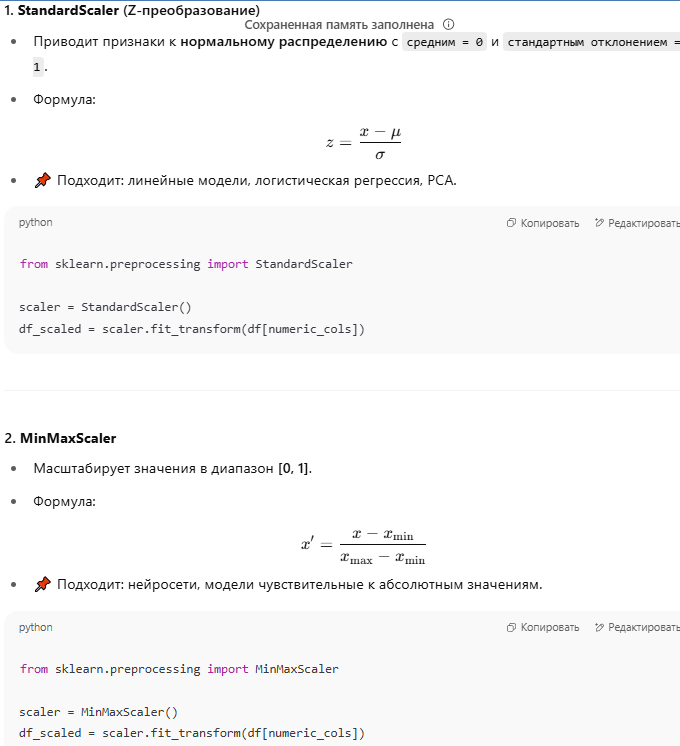

In [91]:
Image('scale1.png')

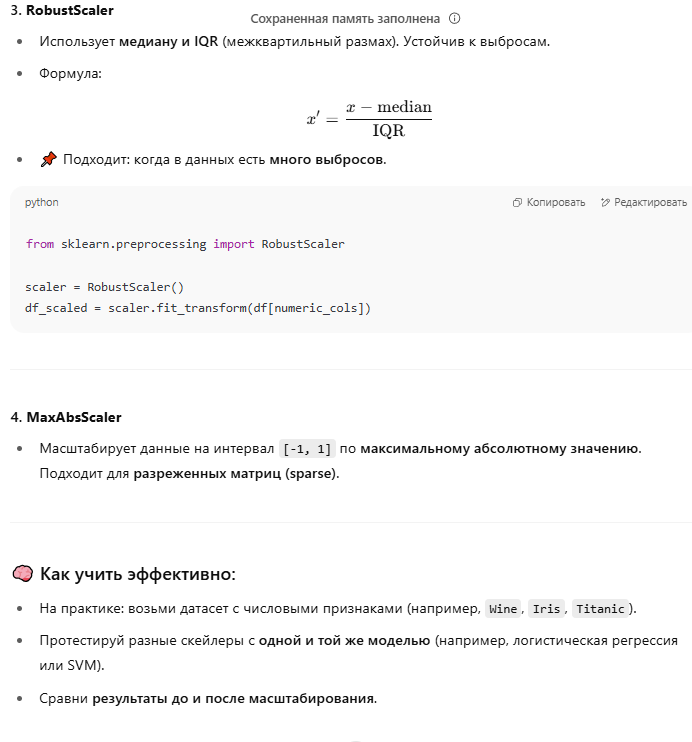

In [92]:
Image('scale2.png')

## ❗Важно:
* Не масштабируй категориальные признаки.
* Масштабируй только train → затем transform на test!

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score

# Данные
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(scaler=None):
    if scaler:
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

print("Без масштабирования:", evaluate_model())
print("StandardScaler:", evaluate_model(StandardScaler()))
print("MinMaxScaler:", evaluate_model(MinMaxScaler()))
print("RobustScaler:", evaluate_model(RobustScaler()))


Без масштабирования: 1.0
StandardScaler: 1.0
MinMaxScaler: 0.9666666666666667
RobustScaler: 1.0


* Без масштабирования точность может быть чуть хуже.
* StandardScaler почти всегда даёт лучший результат с логистической регрессией.
* RobustScaler может работать лучше, если будут выбросы.



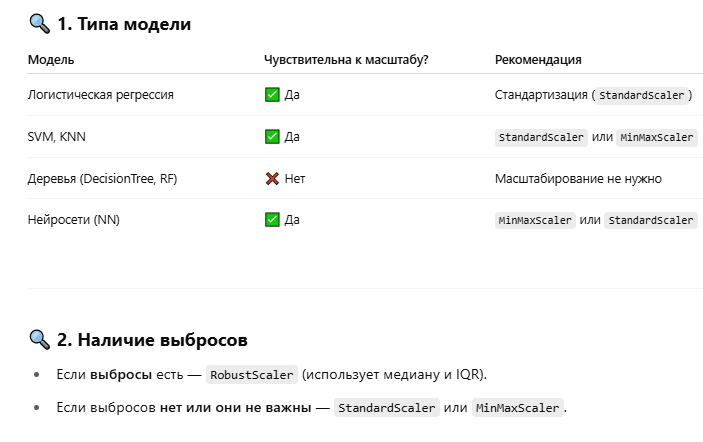

In [94]:
Image('scale_advice.png')

# Тема № 5: обработка выбросов (outliers)

### Что такое выбросы?
* Это значения, резко отличающиеся от остальных, которые могут:
* Портить метрики (например, MAE/MSE),
* Вводить в заблуждение алгоритмы (особенно чувствительные к масштабу — линейные модели, KNN, SVM),
* Быть ошибками ввода (например, "1000 лет опыта").

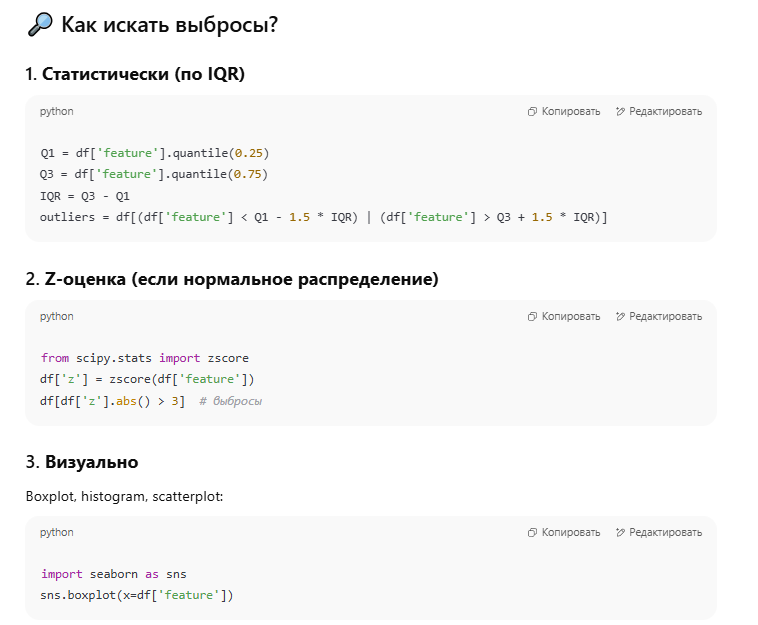

In [95]:
Image('how_find.png')

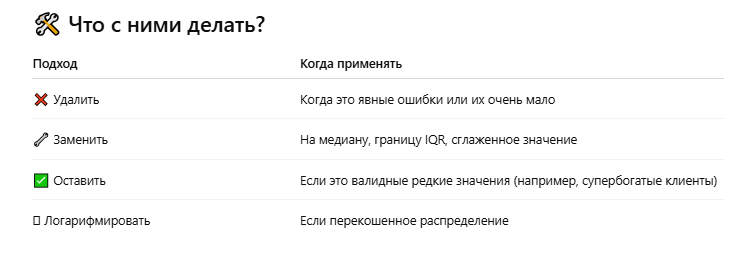

In [96]:
Image('handle.png')

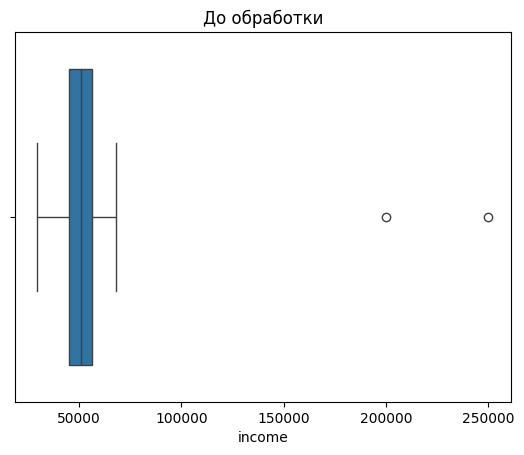

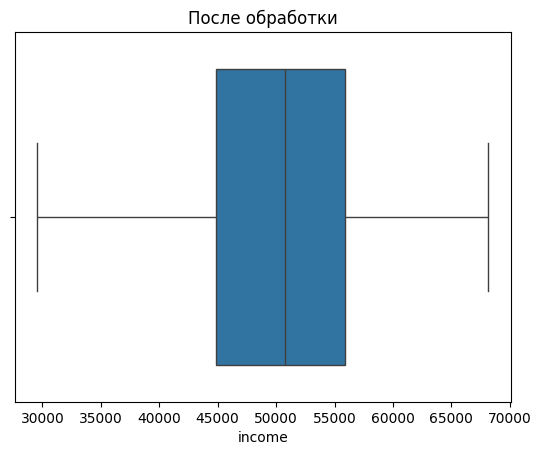

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Пример датафрейма
np.random.seed(0)
data = pd.DataFrame({
    'income': np.append(np.random.normal(50000, 8000, 100), [200000, 250000])
})

# Визуализация
sns.boxplot(x=data['income'])
plt.title("До обработки")
plt.show()

# Удаление выбросов по IQR
Q1 = data['income'].quantile(0.25)
Q3 = data['income'].quantile(0.75)
IQR = Q3 - Q1

filtered = data[(data['income'] >= Q1 - 1.5 * IQR) & (data['income'] <= Q3 + 1.5 * IQR)]

# Визуализация после
sns.boxplot(x=filtered['income'])
plt.title("После обработки")
plt.show()


# Финальное задание
### Обработка пропусков:
* Заполни Age медианой.
* Заполни Gender модой.
* Заполни Salary средним значением.
* Заполни City значением "Unknown".
### Кодирование:
* Применить One-Hot Encoding для City.
* Label Encoding (вручную) для Gender (Male → 0, Female → 1).
### Масштабирование:
* Приведи Age и Salary к [0, 1] через MinMaxScaler (можно вручную).
### Создание нового признака:
* Создай новый бинарный признак IsYoung, который равен 1, если возраст меньше 35.
### Обработка выбросов:
* Удали строки, где Salary выше, чем 1.5 * IQR от Q3 (по правилу межквартильного размаха).



In [99]:
import warnings
warnings.filterwarnings('ignore')

In [178]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Age': [25, np.nan, 35, 45, np.nan, 50],
    'Gender': ['Male', 'Female', np.nan, 'Female', 'Male', np.nan],
    'Salary': [40000, 42000, 50000, 60000, np.nan, 58000],
    'City': ['Almaty', 'Astana', 'Almaty', 'Shymkent', np.nan, 'Astana'],
    'Purchased': [0, 1, 0, 1, 0, 1]
})


In [179]:
df.Age.fillna(df.Age.median(), inplace=True)
df.Gender.fillna(df.Gender.mode()[0], inplace=True)
df.Salary.fillna(df.Salary.mean(), inplace=True)
df.City.fillna('Unknown', inplace=True)



In [180]:
#df['is_male'] = (df['Gender'] == 'Male').astype(int)
#df['is_female'] = (df['Gender'] == 'Female').astype(int)
#df.drop(columns='Gender', inplace=True)

df['Gender'] = (df['Gender']=='Male').astype(int)
df

,Age,Gender,Salary,City,Purchased
0,25.0,1,40000.0,Almaty,0
1,40.0,0,42000.0,Astana,1
2,35.0,0,50000.0,Almaty,0
3,45.0,0,60000.0,Shymkent,1
4,40.0,1,50000.0,Unknown,0
5,50.0,0,58000.0,Astana,1


In [181]:
df_encoded = pd.get_dummies(df).astype(int)

In [182]:
df_encoded

,Age,Gender,Salary,Purchased,City_Almaty,City_Astana,City_Shymkent,City_Unknown
0,25,1,40000,0,1,0,0,0
1,40,0,42000,1,0,1,0,0
2,35,0,50000,0,1,0,0,0
3,45,0,60000,1,0,0,1,0
4,40,1,50000,0,0,0,0,1
5,50,0,58000,1,0,1,0,0


In [183]:
df_encoded['Salary_scaled'] = (df.Salary - df.Salary.min()) / (df.Salary.max() - df.Salary.min()) # чтобы не потерять ориг значения (на всякий случай)

In [184]:
df_encoded['is_young'] = (df.Age < 35).astype(int)

In [185]:
Q1 = df_encoded['Salary_scaled'].quantile(0.25)
Q3 = df_encoded['Salary_scaled'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_final = df_encoded[(df_encoded['Salary_scaled'] >= lower_bound) & (df_encoded['Salary_scaled'] <= upper_bound)]


In [186]:
df_final

,Age,Gender,Salary,Purchased,City_Almaty,City_Astana,City_Shymkent,City_Unknown,Salary_scaled,is_young
0,25,1,40000,0,1,0,0,0,0.0,1
1,40,0,42000,1,0,1,0,0,0.1,0
2,35,0,50000,0,1,0,0,0,0.5,0
3,45,0,60000,1,0,0,1,0,1.0,0
4,40,1,50000,0,0,0,0,1,0.5,0
5,50,0,58000,1,0,1,0,0,0.9,0


In [188]:
print(Q1, Q3, IQR)
print(df_encoded['Salary_scaled'].min(), df_encoded['Salary_scaled'].max())


0.2 0.8 0.6000000000000001
0.0 1.0


# финальный чек-лист по предобработке данных

## 1. Обработка пропущенных значений (NaN)
* Числовые признаки → mean(), median() или продвинутые методы (например, KNN imputation)
* Категориальные признаки → mode() или заполнение специальной меткой ('Unknown', 'Missing')
* Обязательно делать на обучающей выборке, затем применять к test через сохранённые значения
* 
## ✅ 2. Кодирование категориальных признаков
* One-Hot Encoding (для логрегрессий, KNN и линейных моделей)
* Ordinal Encoding (если категории имеют порядок)
* Target Encoding (только на train — чтобы не было data leakage)
* Label Encoding (редко, если нужно просто числа)

## ✅ 3. Создание новых признаков
* Логические признаки (is_young, is_high_income, has_kids, …)
* Временные признаки (день недели, месяц, час, разница во времени)
* Комбинации признаков (df['income_per_age'] = df['Income'] / df['Age'])

## ✅ 4. Масштабирование признаков
* StandardScaler (z-score): для линейных моделей, PCA, SVM
* MinMaxScaler: если важны относительные различия (например, в нейронках)
* RobustScaler: если есть выбросы
* Не масштабировать категориальные и бинарные флаги!

## ✅ 5. Обработка выбросов
* IQR-метод (оставить только значения между Q1 – 1.5×IQR и Q3 + 1.5×IQR)
* z-score > 3 → потенциальный выброс
* Визуализация: boxplot, scatter
* Можно обрезать (clip), заменить или просто оставить, если модель устойчива

## ✅ 6. Проверка мультиколлинеарности (если нужно)
* df.corr() → посмотреть сильно коррелирующие признаки
* VIF (variance inflation factor)
* Удаление/объединение коррелирующих признаков

## ✅ 7. Финальная проверка
* df.info() — нет ли пропусков
* df.describe() — проверка масштаба, выбросов
* df.head() — все ли признаки на месте
* Разделить train/test перед трансформациями и избегать data leakage

Пример пайплайна

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # пример модели

# 1. Загрузка данных
df = pd.read_csv("data.csv")

# 2. Разделение признаков и целевой переменной
X = df.drop(columns="target")
y = df["target"]

# 3. Разделение на train/test ДО любых трансформаций
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Определение признаков
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

# 5. Пайплайн для числовых признаков
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# 6. Пайплайн для категориальных признаков
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# 7. Общий трансформер
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# 8. Финальный пайплайн (обработка + модель)
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# 9. Обучение модели
model_pipeline.fit(X_train, y_train)

# 10. Оценка
print("Train score:", model_pipeline.score(X_train, y_train))
print("Test score:", model_pipeline.score(X_test, y_test))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Загрузка данных
df = pd.read_csv("data.csv")

# 2. Делим на признаки и целевую переменную
X = df.drop(columns="target")
y = df["target"]

# 3. Делим на train/test ДО обработки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Определяем типы признаков
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# =============== ОБРАБОТКА ЧИСЛОВЫХ ПРИЗНАКОВ ===============

# 5. Пропущенные значения → медиана
num_imputer = SimpleImputer(strategy="median")
X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]), columns=num_cols)
X_test_num  = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)

# 6. Масштабирование
scaler = StandardScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(X_train_num), columns=num_cols)
X_test_num  = pd.DataFrame(scaler.transform(X_test_num), columns=num_cols)

# =============== ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ ===============

# 7. Пропущенные значения → 'missing'
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_cols]), columns=cat_cols)
X_test_cat  = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)

# 8. One-Hot Encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_train_cat_encoded = pd.DataFrame(encoder.fit_transform(X_train_cat), columns=encoder.get_feature_names_out(cat_cols))
X_test_cat_encoded  = pd.DataFrame(encoder.transform(X_test_cat), columns=encoder.get_feature_names_out(cat_cols))

# =============== СБОРКА ОБРАБОТАННОГО ДАТАСЕТА ===============
X_train_processed = pd.concat([X_train_num.reset_index(drop=True), X_train_cat_encoded.reset_index(drop=True)], axis=1)
X_test_processed  = pd.concat([X_test_num.reset_index(drop=True), X_test_cat_encoded.reset_index(drop=True)], axis=1)

# =============== ОБУЧЕНИЕ МОДЕЛИ ===============
model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train)

# =============== ОЦЕНКА КАЧЕСТВА ===============
y_pred = model.predict(X_test_processed)
print("Accuracy:", accuracy_score(y_test, y_pred))
